In [1]:
import pandas as pd
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Importing dataset 

In [128]:
data= pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv')

In [129]:
data.head()

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0  30-06-2013          28.7          21.4    58.255688    91.116364   
1      2.0  30-06-2013          31.9          21.6    52.263397    90.604721   
2      3.0  30-06-2013          31.6          23.3    48.690479    83.973587   
3      4.0  30-06-2013          32.0          23.4    58.239788    96.483688   
4      5.0  30-06-2013          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  ...  LDAPS_PPT2  \
0         28.074101         23.006936  6.818887   69.451805  ...         0.0   
1         29.850689         24.035009  5.691890   51.937448  ...         0.0   
2         30.091292         24.565633  6.138224   20.573050  ...         0.0   
3         29.704629         23.326177  5.650050   65.727144  ...         0.0   
4         29.113934         23.486480  5.735004  107.965535  ...         0.0   

   LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM   Slope  \
0         0.0         0.0  37.6046  126.991  212.3350  2.7850   
1         0.0         0.0  37.6046  127.032   44.7624  0.5141   
2         0.0         0.0  37.5776  127.058   33.3068  0.2661   
3         0.0         0.0  37.6450  127.022   45.7160  2.5348   
4         0.0         0.0  37.5507  127.135   35.0380  0.5055   

   Solar radiation  Next_Tmax  Next_Tmin  
0      5992.895996       29.1       21.2  
1      5869.312500       30.5       22.5  
2      5863.555664       31.1       23.9  
3      5856.964844       31.7       24.3  
4      5859.552246       31.2       22.5  

[5 rows x 25 columns]

###### Next_Tmax: Next day maximum temperature
###### Next_Tmin: Next day  minimum temperature
This Both variables are our target variables.

In [161]:
### checking size of our dataset
data.shape

(7750, 25)

Our dataset size is it contain 7752 rows and 25 columns

In [162]:
### Checking data basic info
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7750 entries, 0 to 7749
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7750 non-null   float64
 3   Present_Tmin      7750 non-null   float64
 4   LDAPS_RHmin       7750 non-null   float64
 5   LDAPS_RHmax       7750 non-null   float64
 6   LDAPS_Tmax_lapse  7750 non-null   float64
 7   LDAPS_Tmin_lapse  7750 non-null   float64
 8   LDAPS_WS          7750 non-null   float64
 9   LDAPS_LH          7750 non-null   float64
 10  LDAPS_CC1         7750 non-null   float64
 11  LDAPS_CC2         7750 non-null   float64
 12  LDAPS_CC3         7750 non-null   float64
 13  LDAPS_CC4         7750 non-null   float64
 14  LDAPS_PPT1        7750 non-null   float64
 15  LDAPS_PPT2        7750 non-null   float64
 16  LDAPS_PPT3        7750 non-null   float64


We can see only Date column is object rest all the columns are in Float64

In [163]:
### checking for null values
data.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

We can see except lat, lon, DEM ,Slope and Solar Radiation columns do not have any null values reset all the columns contain Null values.

It seems like all the null values in columns name start with LDAPS are having same row missing data.

In [7]:
data.loc[np.where(data['Date'].isnull() == True)]

station Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
7750      NaN  NaN          20.0          11.3    19.794666    58.936283   
7751      NaN  NaN          37.6          29.9    98.524734   100.000153   

      LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  ...  \
7750         17.624954         14.272646   2.882580  -13.603212  ...   
7751         38.542255         29.619342  21.857621  213.414006  ...   

      LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon      DEM     Slope  \
7750    0.000000    0.000000    0.000000  37.4562  126.826   12.370  0.098475   
7751   21.621661   15.841235   16.655469  37.6450  127.135  212.335  5.178230   

      Solar radiation  Next_Tmax  Next_Tmin  
7750      4329.520508       17.4       11.3  
7751      5992.895996       38.9       29.8  

[2 rows x 25 columns]

In [130]:
### Droping rows where station is Null
data.drop(index=[7750,7751],inplace=True)

In [81]:
data.tail() ### Removed last 2 rows

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
7745     21.0  30-08-2017          23.1          17.8    24.688997   
7746     22.0  30-08-2017          22.5          17.4    30.094858   
7747     23.0  30-08-2017          23.3          17.1    26.741310   
7748     24.0  30-08-2017          23.3          17.7    24.040634   
7749     25.0  30-08-2017          23.2          17.4    22.933014   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS   LDAPS_LH  \
7745    78.261383         27.812697         18.303014  6.603253   9.614074   
7746    83.690018         26.704905         17.814038  5.768083  82.146707   
7747    78.869858         26.352081         18.775678  6.148918  72.058294   
7748    77.294975         27.010193         18.733519  6.542819  47.241457   
7749    77.243744         27.939516         18.522965  7.289264   9.090034   

      ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon      DEM  \
7745  ...         0.0         0.0         0.0  37.5507  127.040  26.2980   
7746  ...         0.0         0.0         0.0  37.5102  127.086  21.9668   
7747  ...         0.0         0.0         0.0  37.5372  126.891  15.5876   
7748  ...         0.0         0.0         0.0  37.5237  126.909  17.2956   
7749  ...         0.0         0.0         0.0  37.5237  126.970  19.5844   

       Slope  Solar radiation  Next_Tmax  Next_Tmin  
7745  0.5721      4456.024414       27.6       17.7  
7746  0.1332      4441.803711       28.0       17.1  
7747  0.1554      4443.313965       28.3       18.1  
7748  0.2223      4438.373535       28.6       18.8  
7749  0.2713      4451.345215       27.8       17.4  

[5 rows x 25 columns]

In [10]:
data.loc[np.where(data['LDAPS_RHmax'].isnull() == True)]

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
1025      1.0  10-08-2013          27.1          24.5          NaN   
1026      2.0  10-08-2013          29.7          25.4          NaN   
1027      3.0  10-08-2013          29.1          25.9          NaN   
1028      4.0  10-08-2013          30.8          27.3          NaN   
1029      5.0  10-08-2013          29.7          25.7          NaN   
...       ...         ...           ...           ...          ...   
5945     21.0  20-08-2016          34.1          27.9          NaN   
5946     22.0  20-08-2016          34.3          27.7          NaN   
5947     23.0  20-08-2016          34.6          28.7          NaN   
5948     24.0  20-08-2016          35.0          28.6          NaN   
5949     25.0  20-08-2016          35.2          28.1          NaN   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  \
1025          NaN               NaN               NaN       NaN       NaN   
1026          NaN               NaN               NaN       NaN       NaN   
1027          NaN               NaN               NaN       NaN       NaN   
1028          NaN               NaN               NaN       NaN       NaN   
1029          NaN               NaN               NaN       NaN       NaN   
...           ...               ...               ...       ...       ...   
5945          NaN               NaN               NaN       NaN       NaN   
5946          NaN               NaN               NaN       NaN       NaN   
5947          NaN               NaN               NaN       NaN       NaN   
5948          NaN               NaN               NaN       NaN       NaN   
5949          NaN               NaN               NaN       NaN       NaN   

      ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
1025  ...         NaN         NaN         NaN  37.6046  126.991  212.3350   
1026  ...         NaN         NaN         NaN  37.6046  127.032   44.7624   
1027  ...         NaN         NaN         NaN  37.5776  127.058   33.3068   
1028  ...         NaN         NaN         NaN  37.6450  127.022   45.7160   
1029  ...         NaN         NaN         NaN  37.5507  127.135   35.0380   
...   ...         ...         ...         ...      ...      ...       ...   
5945  ...         NaN         NaN         NaN  37.5507  127.040   26.2980   
5946  ...         NaN         NaN         NaN  37.5102  127.086   21.9668   
5947  ...         NaN         NaN         NaN  37.5372  126.891   15.5876   
5948  ...         NaN         NaN         NaN  37.5237  126.909   17.2956   
5949  ...         NaN         NaN         NaN  37.5237  126.970   19.5844   

       Slope  Solar radiation  Next_Tmax  Next_Tmin  
1025  2.7850      5304.412598       31.4       22.3  
1026  0.5141      5162.595703       34.3       23.2  
1027  0.2661      5157.235352       33.9       24.0  
1028  2.5348      5148.043945       34.9       24.5  
1029  0.5055      5147.667969       32.9       23.3  
...      ...              ...        ...        ...  
5945  0.5721      4795.120117       35.5       27.5  
5946  0.1332      4782.181641       36.2       27.5  
5947  0.1554      4783.152832       37.3       28.8  
5948  0.2223      4778.877930       37.0       28.7  
5949  0.2713      4790.469727       36.7       28.0  

[75 rows x 25 columns]

In [131]:
### storing columns which contain null values in cols variable
cols = ['Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'Next_Tmax', 'Next_Tmin']

In [132]:
### Let's import Iterative imputer  to fill this null values.
from sklearn.impute import KNNImputer
KNN_imp = KNNImputer()
data[cols] = KNN_imp.fit_transform(data[['Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4','Next_Tmax', 'Next_Tmin']])

In [164]:
### checking for null values
data.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [14]:
data.loc[1020:1029]

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
1020     21.0  09-08-2013          30.6          27.6    40.587376   
1021     22.0  09-08-2013          32.7          27.1    47.036228   
1022     23.0  09-08-2013          31.9          28.0    52.486015   
1023     24.0  09-08-2013          31.4          28.0    48.948959   
1024     25.0  09-08-2013          31.3          28.4    43.451229   
1025      1.0  10-08-2013          27.1          24.5    46.530711   
1026      2.0  10-08-2013          29.7          25.4    59.313553   
1027      3.0  10-08-2013          29.1          25.9    60.417106   
1028      4.0  10-08-2013          30.8          27.3    51.365468   
1029      5.0  10-08-2013          29.7          25.7    42.223687   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  \
1020    91.556885         34.339890         25.623612  8.611711   44.633469   
1021    89.368385         33.541557         25.614863  8.547028  114.702374   
1022    90.834206         32.149386         25.630080  8.057632  109.887116   
1023    89.985405         33.013122         25.583503  8.427767   73.829126   
1024    90.767288         34.076383         25.665936  8.853538   51.696736   
1025    90.402432         30.598170         23.384991  6.133489   59.074701   
1026    94.289951         30.805855         24.278987  7.444395   92.009136   
1027    92.483142         31.766791         24.859015  5.887088   86.202714   
1028    92.838988         33.590272         25.079410  5.379857   74.496282   
1029    88.288654         31.381749         23.737605  6.753612   64.758337   

      ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
1020  ...    0.000000    0.000000    0.000000  37.5507  127.040   26.2980   
1021  ...    0.000477    0.000000    0.000000  37.5102  127.086   21.9668   
1022  ...    0.000000    0.000000    0.000000  37.5372  126.891   15.5876   
1023  ...    0.000000    0.000000    0.000000  37.5237  126.909   17.2956   
1024  ...    0.000000    0.000000    0.000000  37.5237  126.970   19.5844   
1025  ...    0.001521    0.000000    0.000000  37.6046  126.991  212.3350   
1026  ...    0.000000    0.551661    0.004753  37.6046  127.032   44.7624   
1027  ...    0.000000    0.003230    0.000000  37.5776  127.058   33.3068   
1028  ...    0.000000    0.308400    0.000000  37.6450  127.022   45.7160   
1029  ...    0.000000    0.000000    0.000000  37.5507  127.135   35.0380   

       Slope  Solar radiation  Next_Tmax  Next_Tmin  
1020  0.5721      5182.426270       28.9       25.2  
1021  0.1332      5171.381348       29.6       24.9  
1022  0.1554      5171.602051       30.2       25.8  
1023  0.2223      5168.284668       30.2       26.3  
1024  0.2713      5177.867676       30.3       26.1  
1025  2.7850      5304.412598       31.4       22.3  
1026  0.5141      5162.595703       34.3       23.2  
1027  0.2661      5157.235352       33.9       24.0  
1028  2.5348      5148.043945       34.9       24.5  
1029  0.5055      5147.667969       32.9       23.3  

[10 rows x 25 columns]

In [15]:
data.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

We can see all the null values are fill with appropiate values now. We can go for futher EDA  now.

In [16]:
### Checking dates unique values.
data['Date'].value_counts().unique

<bound method Series.unique of 20-08-2017    25
24-07-2016    25
04-08-2015    25
14-08-2013    25
17-07-2015    25
              ..
29-07-2013    25
05-07-2016    25
15-08-2014    25
17-07-2016    25
03-08-2017    25
Name: Date, Length: 310, dtype: int64>

WE have 25 entries for each date for each 25 stations.

In [165]:
### Lets split our Date folder in Days months and years
### Let's split Date_of_Journey column into day month and year.
data['Date'] = pd.to_datetime(data['Date'])
data['Day'] = data['Date'].dt.day
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year

In [166]:
data.drop('Date',axis=1,inplace=True)
data.head()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0          28.7          21.4    58.255688    91.116364   
1      2.0          31.9          21.6    52.263397    90.604721   
2      3.0          31.6          23.3    48.690479    83.973587   
3      4.0          32.0          23.4    58.239788    96.483688   
4      5.0          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  ...  \
0         28.074101         23.006936  6.818887   69.451805   0.233947  ...   
1         29.850689         24.035009  5.691890   51.937448   0.225508  ...   
2         30.091292         24.565633  6.138224   20.573050   0.209344  ...   
3         29.704629         23.326177  5.650050   65.727144   0.216372  ...   
4         29.113934         23.486480  5.735004  107.965535   0.151407  ...   

       lat      lon       DEM   Slope  Solar radiation  Next_Tmax  Next_Tmin  \
0  37.6046  126.991  212.3350  2.7850      5992.895996       29.1       21.2   
1  37.6046  127.032   44.7624  0.5141      5869.312500       30.5       22.5   
2  37.5776  127.058   33.3068  0.2661      5863.555664       31.1       23.9   
3  37.6450  127.022   45.7160  2.5348      5856.964844       31.7       24.3   
4  37.5507  127.135   35.0380  0.5055      5859.552246       31.2       22.5   

   Day  Month  Year  
0   30      6  2013  
1   30      6  2013  
2   30      6  2013  
3   30      6  2013  
4   30      6  2013  

[5 rows x 27 columns]

Now our all the columns are in integer and Float.

In [19]:
### Checking statistical Description
data.describe()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
count  7750.000000   7750.000000   7750.000000  7750.000000  7750.000000   
mean     13.000000     29.767915     23.230196    56.720452    88.365368   
std       7.211568      2.961635      2.405464    14.602776     7.161441   
min       1.000000     20.000000     11.300000    19.794666    58.936283   
25%       7.000000     27.800000     21.700000    45.996462    84.238749   
50%      13.000000     29.900000     23.400000    54.993261    89.750568   
75%      19.000000     32.000000     24.900000    67.032715    93.711714   
max      25.000000     37.600000     29.900000    98.524734   100.000153   

       LDAPS_Tmax_lapse  LDAPS_Tmin_lapse     LDAPS_WS     LDAPS_LH  \
count       7750.000000       7750.000000  7750.000000  7750.000000   
mean          29.638820         23.533946     7.088878    62.553718   
std            2.942413          2.343197     2.168780    33.570407   
min           17.624954         14.272646     2.882580   -13.603212   
25%           27.693733         22.115268     5.682274    37.467873   
50%           29.744213         23.778855     6.541038    57.159677   
75%           31.738455         25.168587     8.007648    84.170250   
max           38.542255         29.619342    21.857621   213.414006   

         LDAPS_CC1  ...          lat          lon          DEM        Slope  \
count  7750.000000  ...  7750.000000  7750.000000  7750.000000  7750.000000   
mean      0.367729  ...    37.544720   126.991400    61.854944     1.256692   
std       0.261502  ...     0.050335     0.079406    54.256953     1.369833   
min       0.000000  ...    37.456200   126.826000    12.370000     0.098500   
25%       0.147760  ...    37.510200   126.937000    28.700000     0.271300   
50%       0.314712  ...    37.550700   126.995000    45.716000     0.618000   
75%       0.571711  ...    37.577600   127.042000    59.832400     1.767800   
max       0.967277  ...    37.645000   127.135000   212.335000     5.178200   

       Solar radiation    Next_Tmax    Next_Tmin          Day        Month  \
count      7750.000000  7750.000000  7750.000000  7750.000000  7750.000000   
mean       5341.549330    30.277621    22.934116    16.370968     7.080645   
std         428.996445     3.121918     2.481310     8.241331     2.238364   
min        4329.520508    17.400000    11.300000     7.000000     1.000000   
25%        4999.018555    28.200000    21.400000     8.000000     7.000000   
50%        5436.345215    30.500000    23.100000    16.000000     7.000000   
75%        5728.316406    32.675000    24.600000    24.000000     8.000000   
max        5992.895996    38.900000    29.800000    31.000000    12.000000   

              Year  
count  7750.000000  
mean   2015.000000  
std       1.414305  
min    2013.000000  
25%    2014.000000  
50%    2015.000000  
75%    2016.000000  
max    2017.000000  

[8 rows x 27 columns]

The count for all the columns is same.
The Std and Mean difference is ok.
Quartiles also look normally distributed for all the columns.

### Let's Visualize our data to get better understanding.
#### (i) Univariate Analysis

Text(0.5, 1.0, 'Present Tmax')

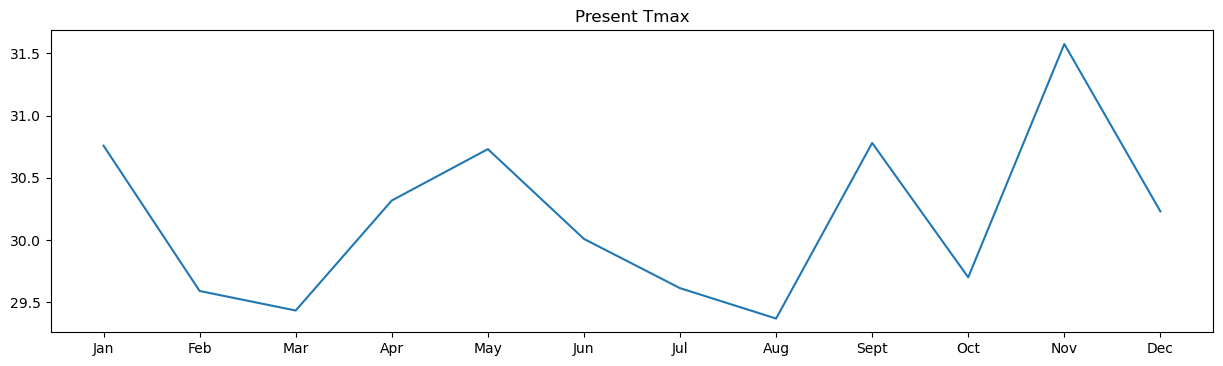

In [20]:
byMonth = data.groupby("Month").mean()
plt.figure(figsize=(15,4),dpi=100)
plt.plot(["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sept","Oct","Nov","Dec"],byMonth['Present_Tmax'])
plt.title('Present Tmax')

Text(0.5, 1.0, 'Present Tmin')

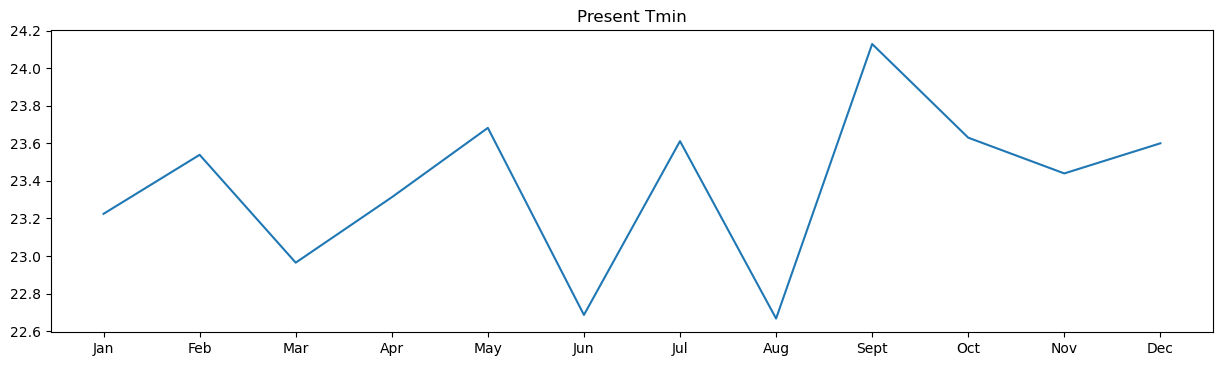

In [21]:
byMonth = data.groupby("Month").mean()
plt.figure(figsize=(15,4),dpi=100)
plt.plot(["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sept","Oct","Nov","Dec"],byMonth['Present_Tmin'])
plt.title('Present Tmin')

By looking both the plots we can say that Temp_Max and Temp_min are started increases from 8th month and then again started decreases by mid of 12th month.

In [22]:
data.shape

(7750, 27)

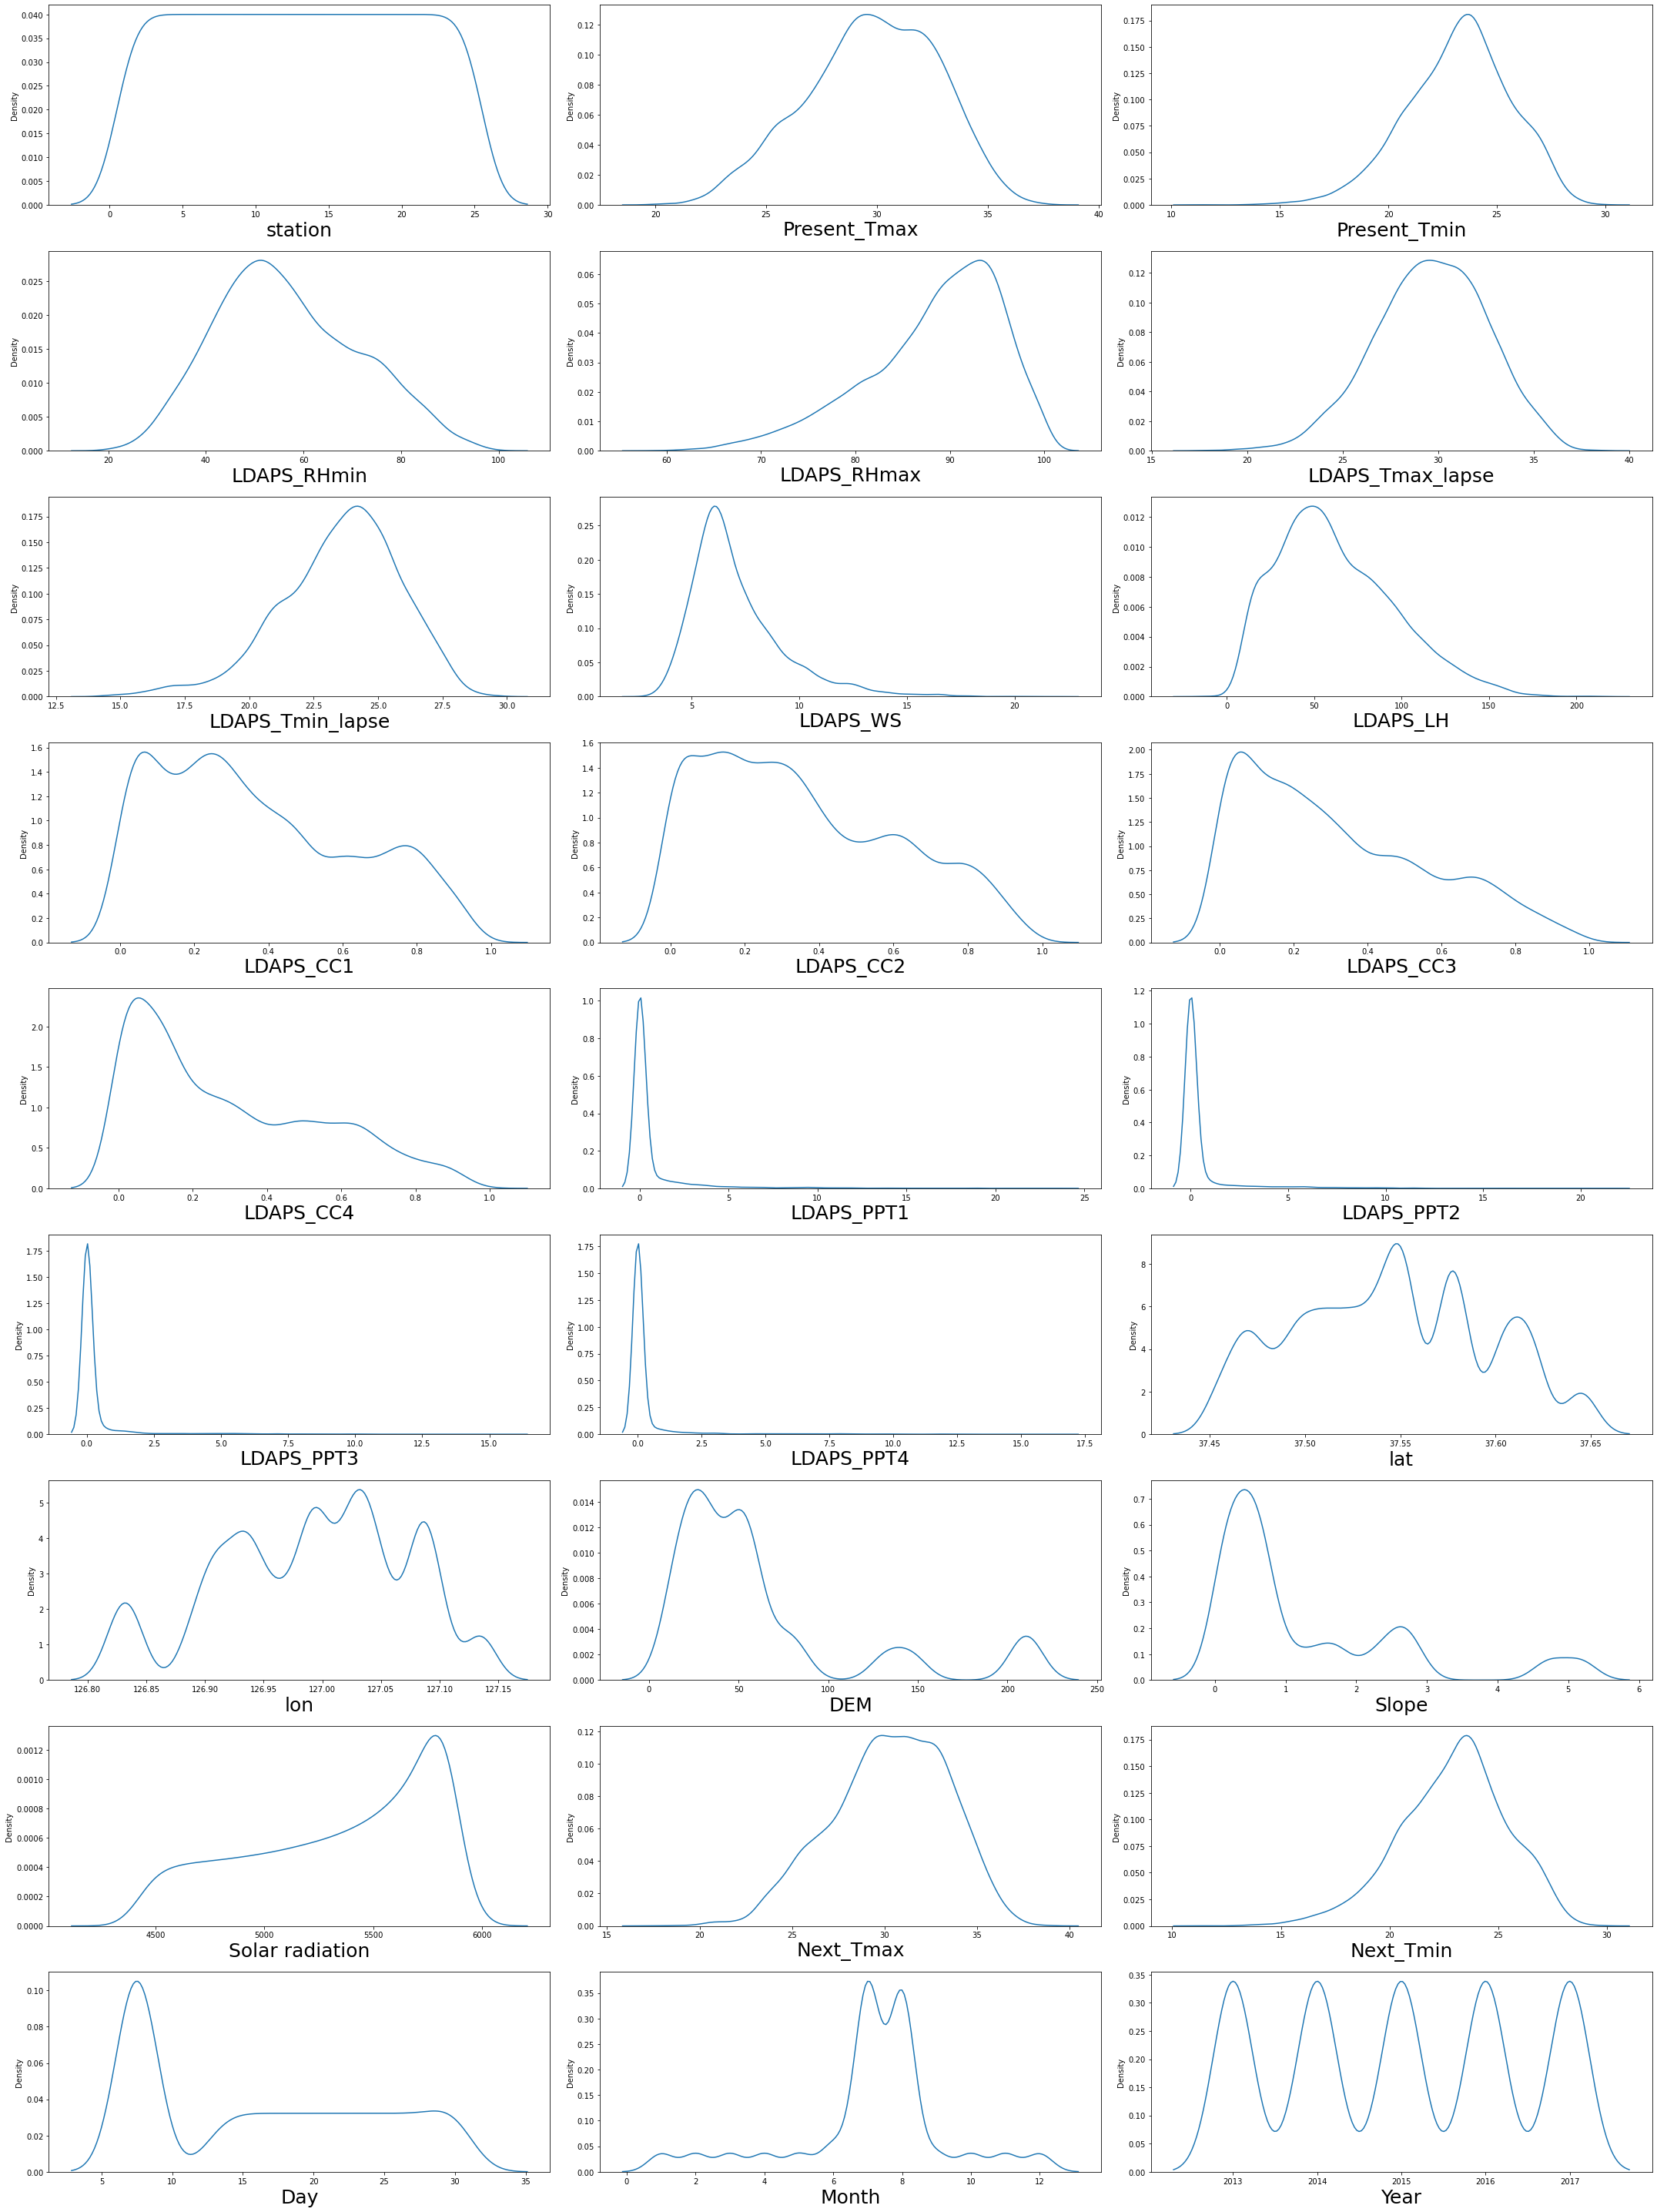

In [23]:
# Checking data distirution for all the features
plt.figure(figsize=(30,40), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber <= 27:
        ax = plt.subplot(9,3,plotnumber)
        sns.kdeplot(data[column])
        plt.xlabel(column,fontsize=25)
        
    plotnumber+=1
plt.tight_layout()

We can see multiple columns contain skewed data.
Slope, LDAPs_PPT1, LDAPs_PPT2, LDAPs_PPT3, LDAPs_PPT4, and DEM Are highty right skewed data.
Need to check Skewness.

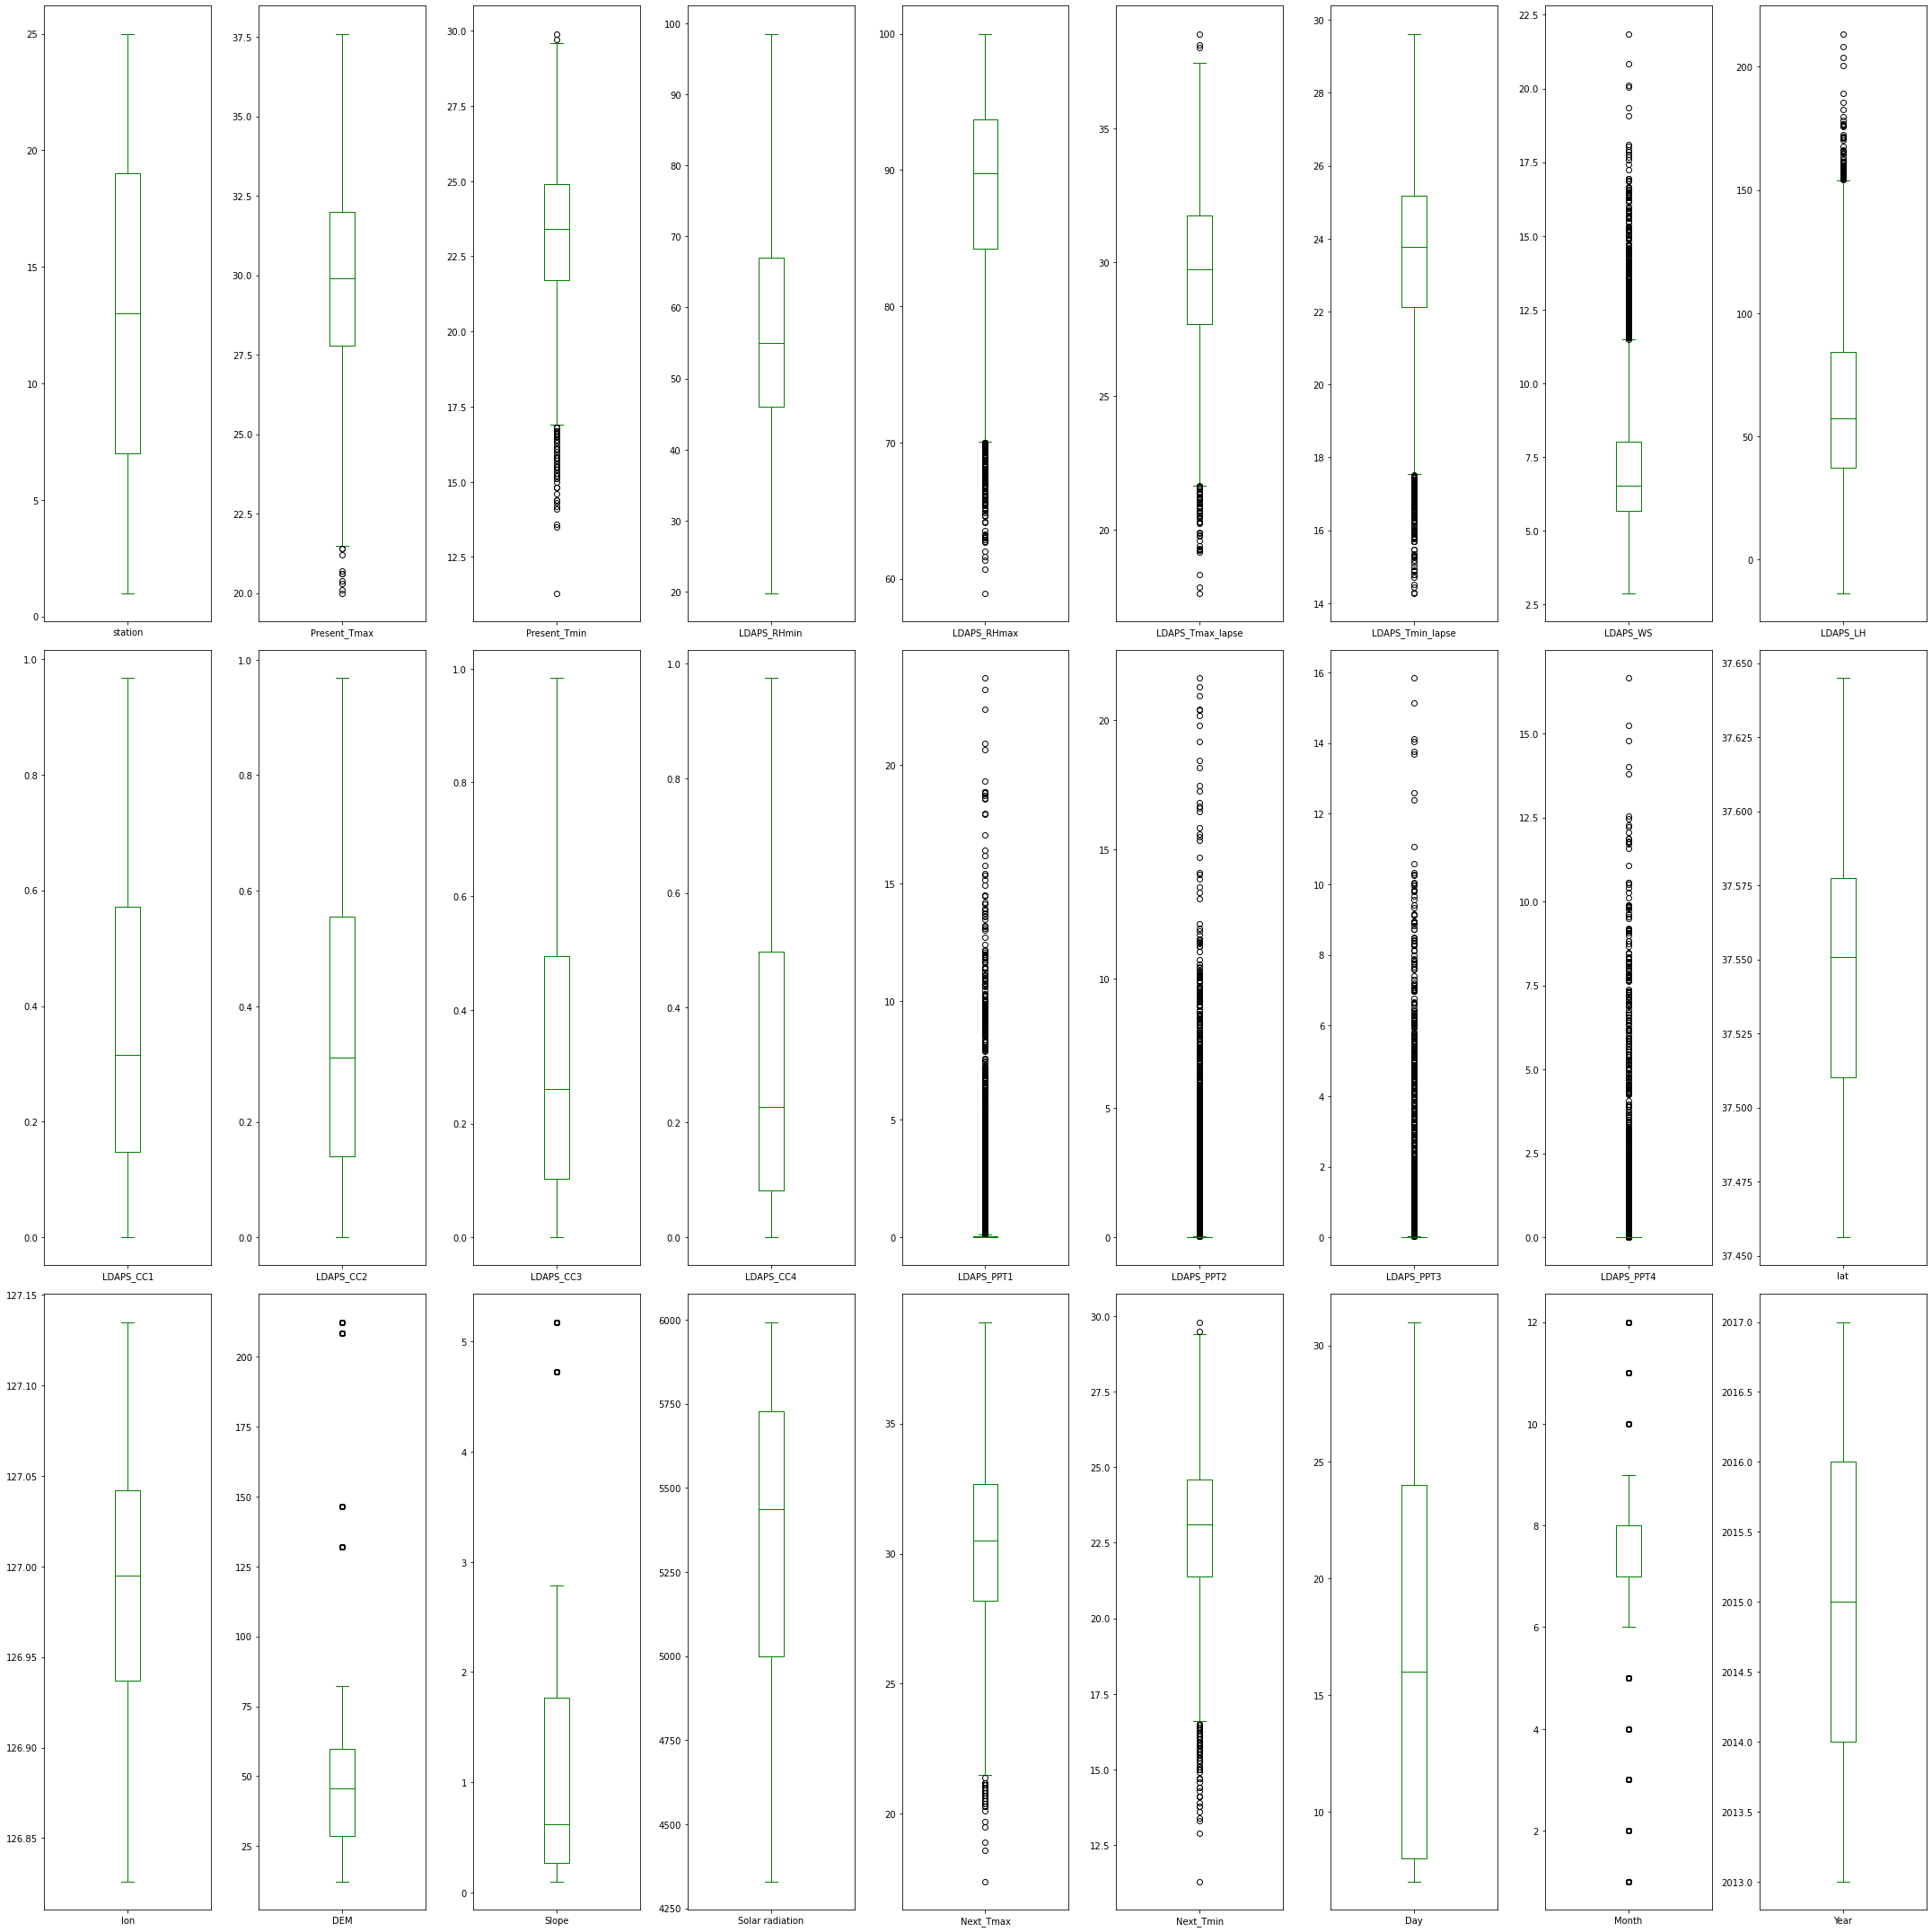

In [24]:
### Checking outlier in each column.
plt.figure(figsize=(30,30),facecolor='white')
count = 1
for column in data:
    if count <=27:
        ax = plt.subplot(3,9,count)
        data[column].plot(kind= 'box', color = 'g')
    count+=1
plt.tight_layout()

From above box plot we can see multiple columns have outliers in data. also LDAPs_PPT1, LDAPs_PPT2, LDAPs_PPT3, LDAPs_PPT4 this columns contain most of the outlier. Will work on removing outliers.

#### (ii) Bivariate Analysis

<AxesSubplot:xlabel='Next_Tmax', ylabel='Next_Tmin'>

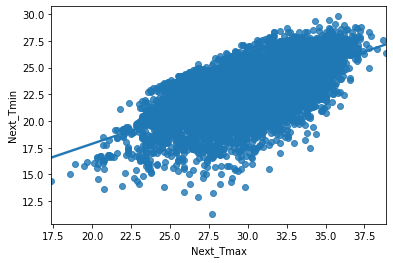

In [61]:
sns.regplot(x='Next_Tmax',y='Next_Tmin',data=data)

We can see both the targete variables are correlated with each other

<AxesSubplot:xlabel='Present_Tmin', ylabel='Next_Tmin'>

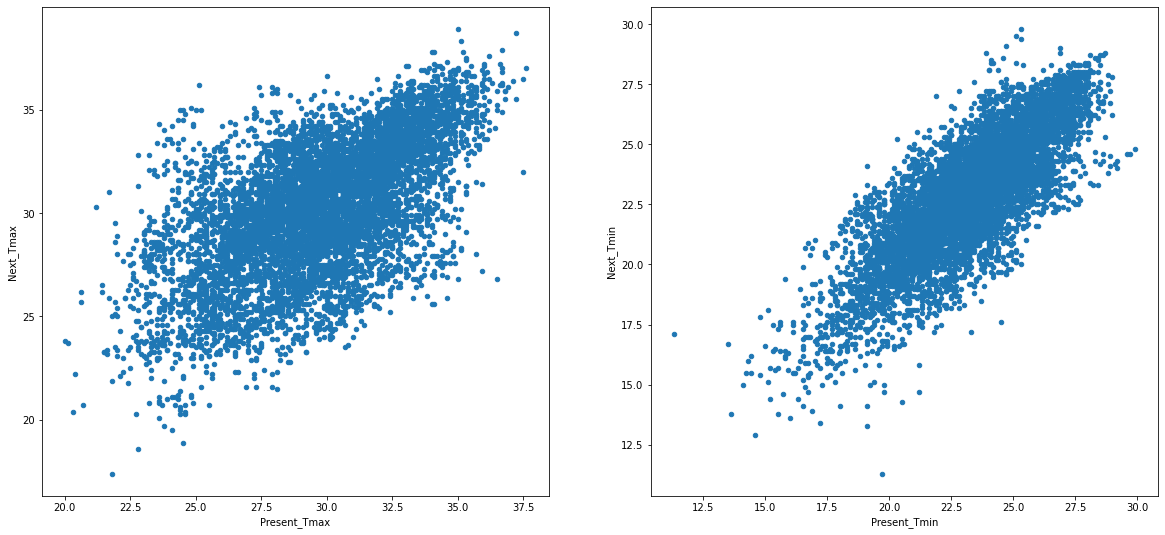

In [33]:
fig, axs = plt.subplots(1, 2)
data.plot(kind ='scatter', x='Present_Tmax', y='Next_Tmax', ax=axs[0], figsize=(20,9))
data.plot(kind ='scatter', x='Present_Tmin', y='Next_Tmin', ax=axs[1])

We can see Present_Tmax is showing linear relationship with Next_Tmax And same with Persent_Tmin and Next_Tmin.

<AxesSubplot:xlabel='Solar radiation', ylabel='Next_Tmin'>

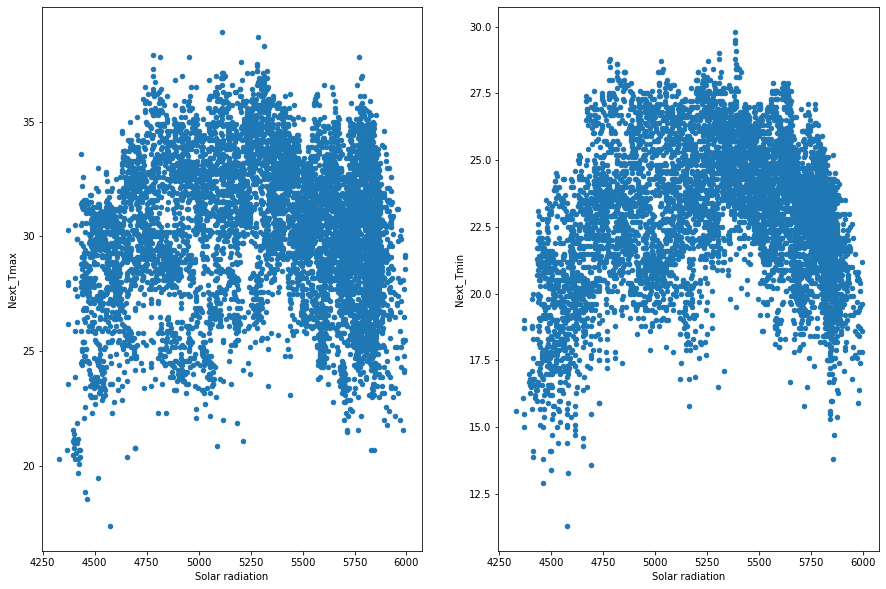

In [36]:
fig, axs = plt.subplots(1, 2)
data.plot(kind ='scatter', x='Solar radiation', y='Next_Tmax', ax=axs[0], figsize=(15,10))
data.plot(kind ='scatter', x='Solar radiation', y='Next_Tmin', ax=axs[1])

We can't see any linear relationship between Solar Radiation and Next_Tmax, Next_Tmin

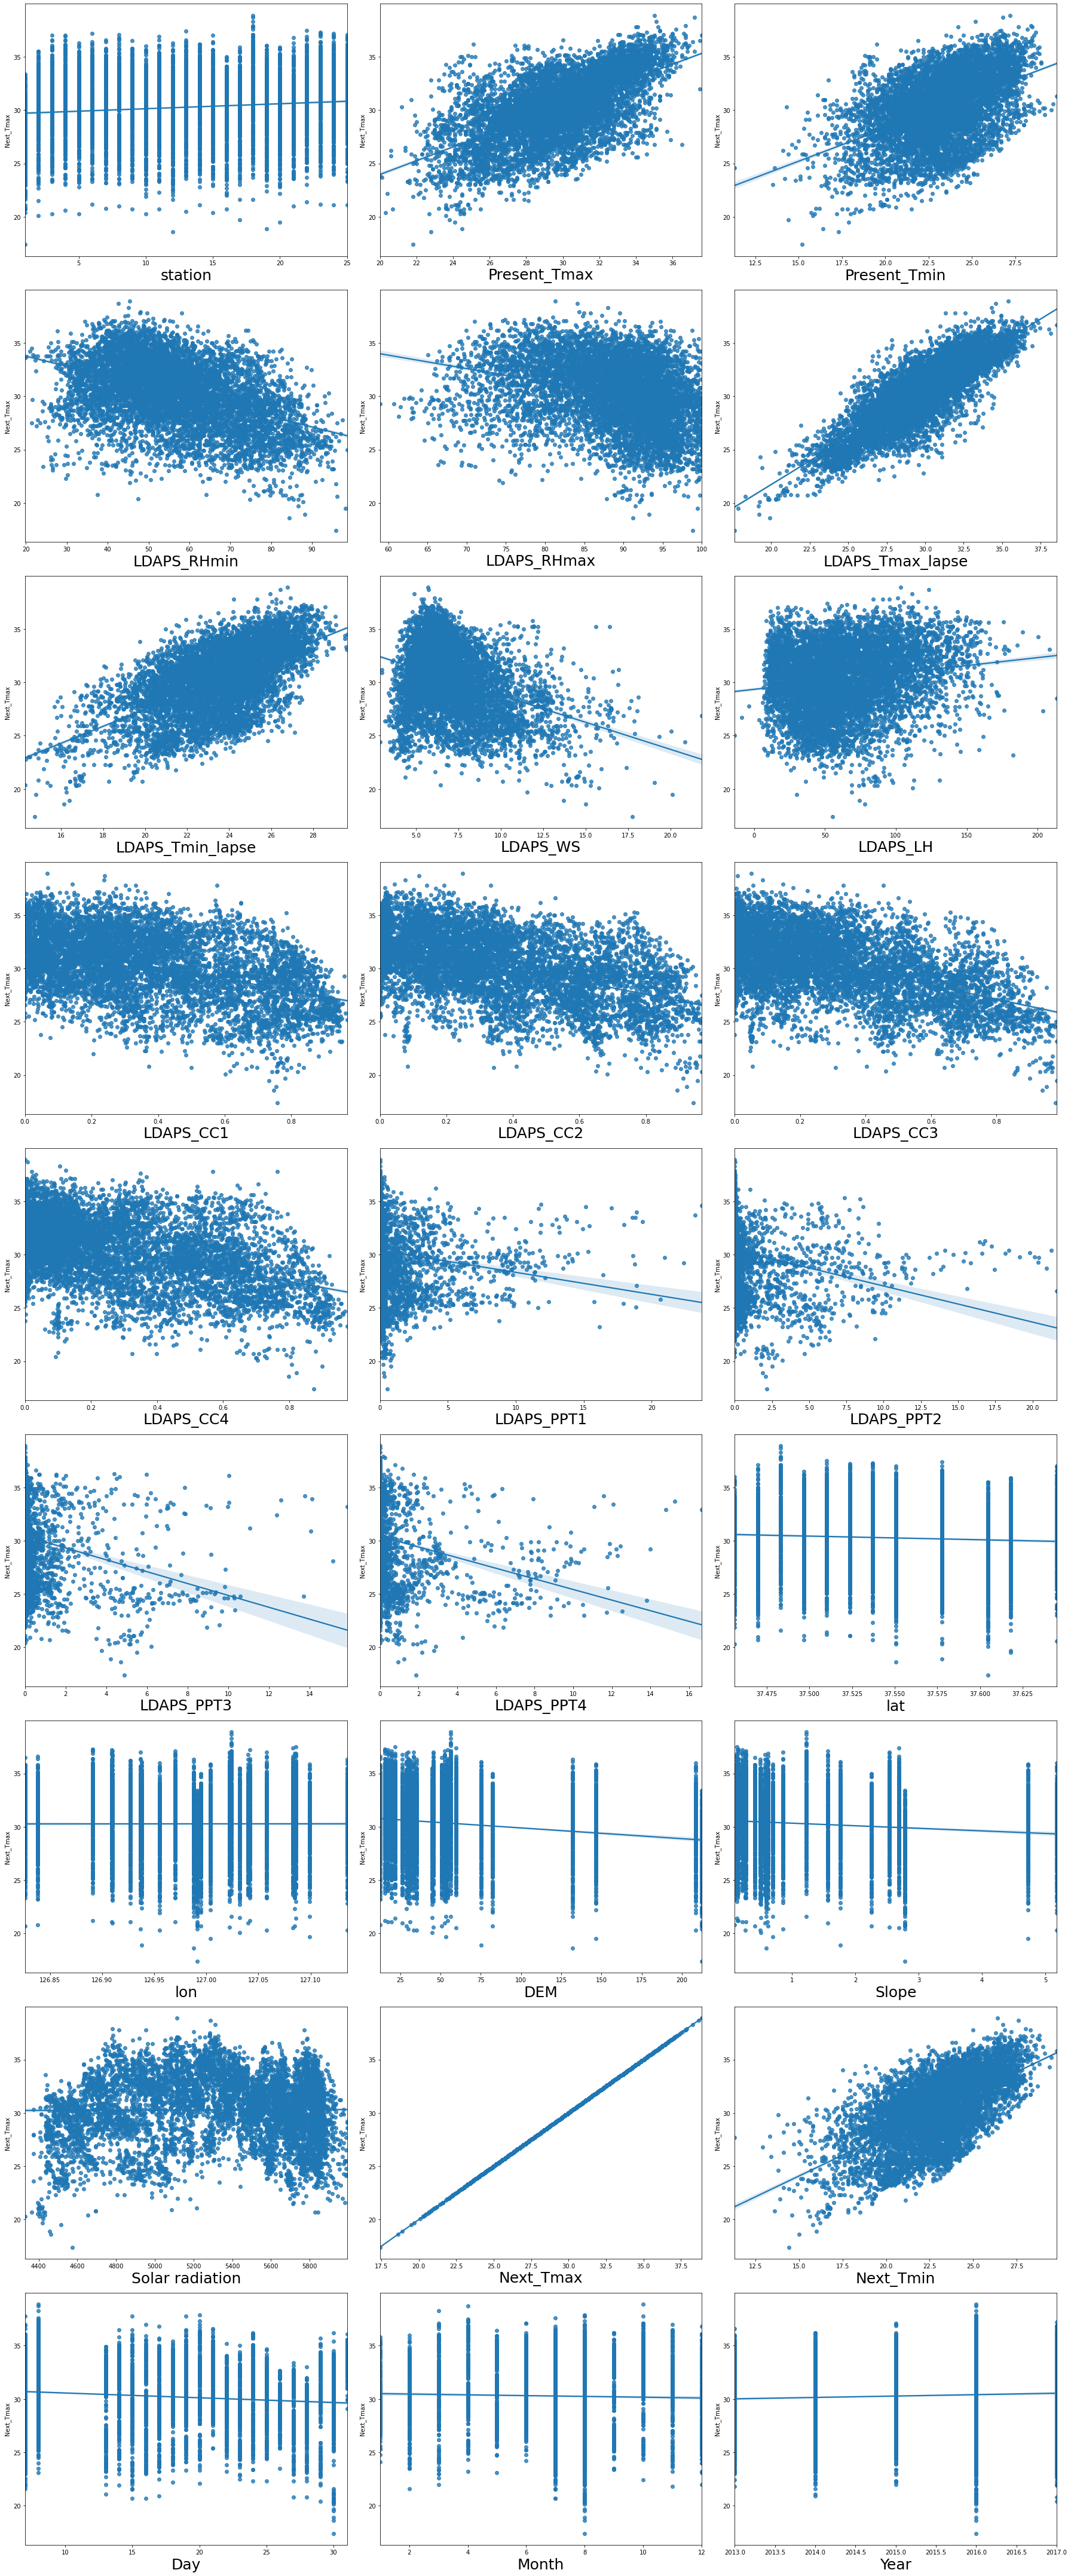

In [48]:
plt.figure(figsize=(25,60), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber <= 27:
        ax = plt.subplot(9,3,plotnumber)
        sns.regplot(x=data[column],y='Next_Tmax',data=data)
        plt.xlabel(column,fontsize=25)
        
    plotnumber+=1
plt.tight_layout()

We can see there are few features which shows linear relationship with our  target variable.

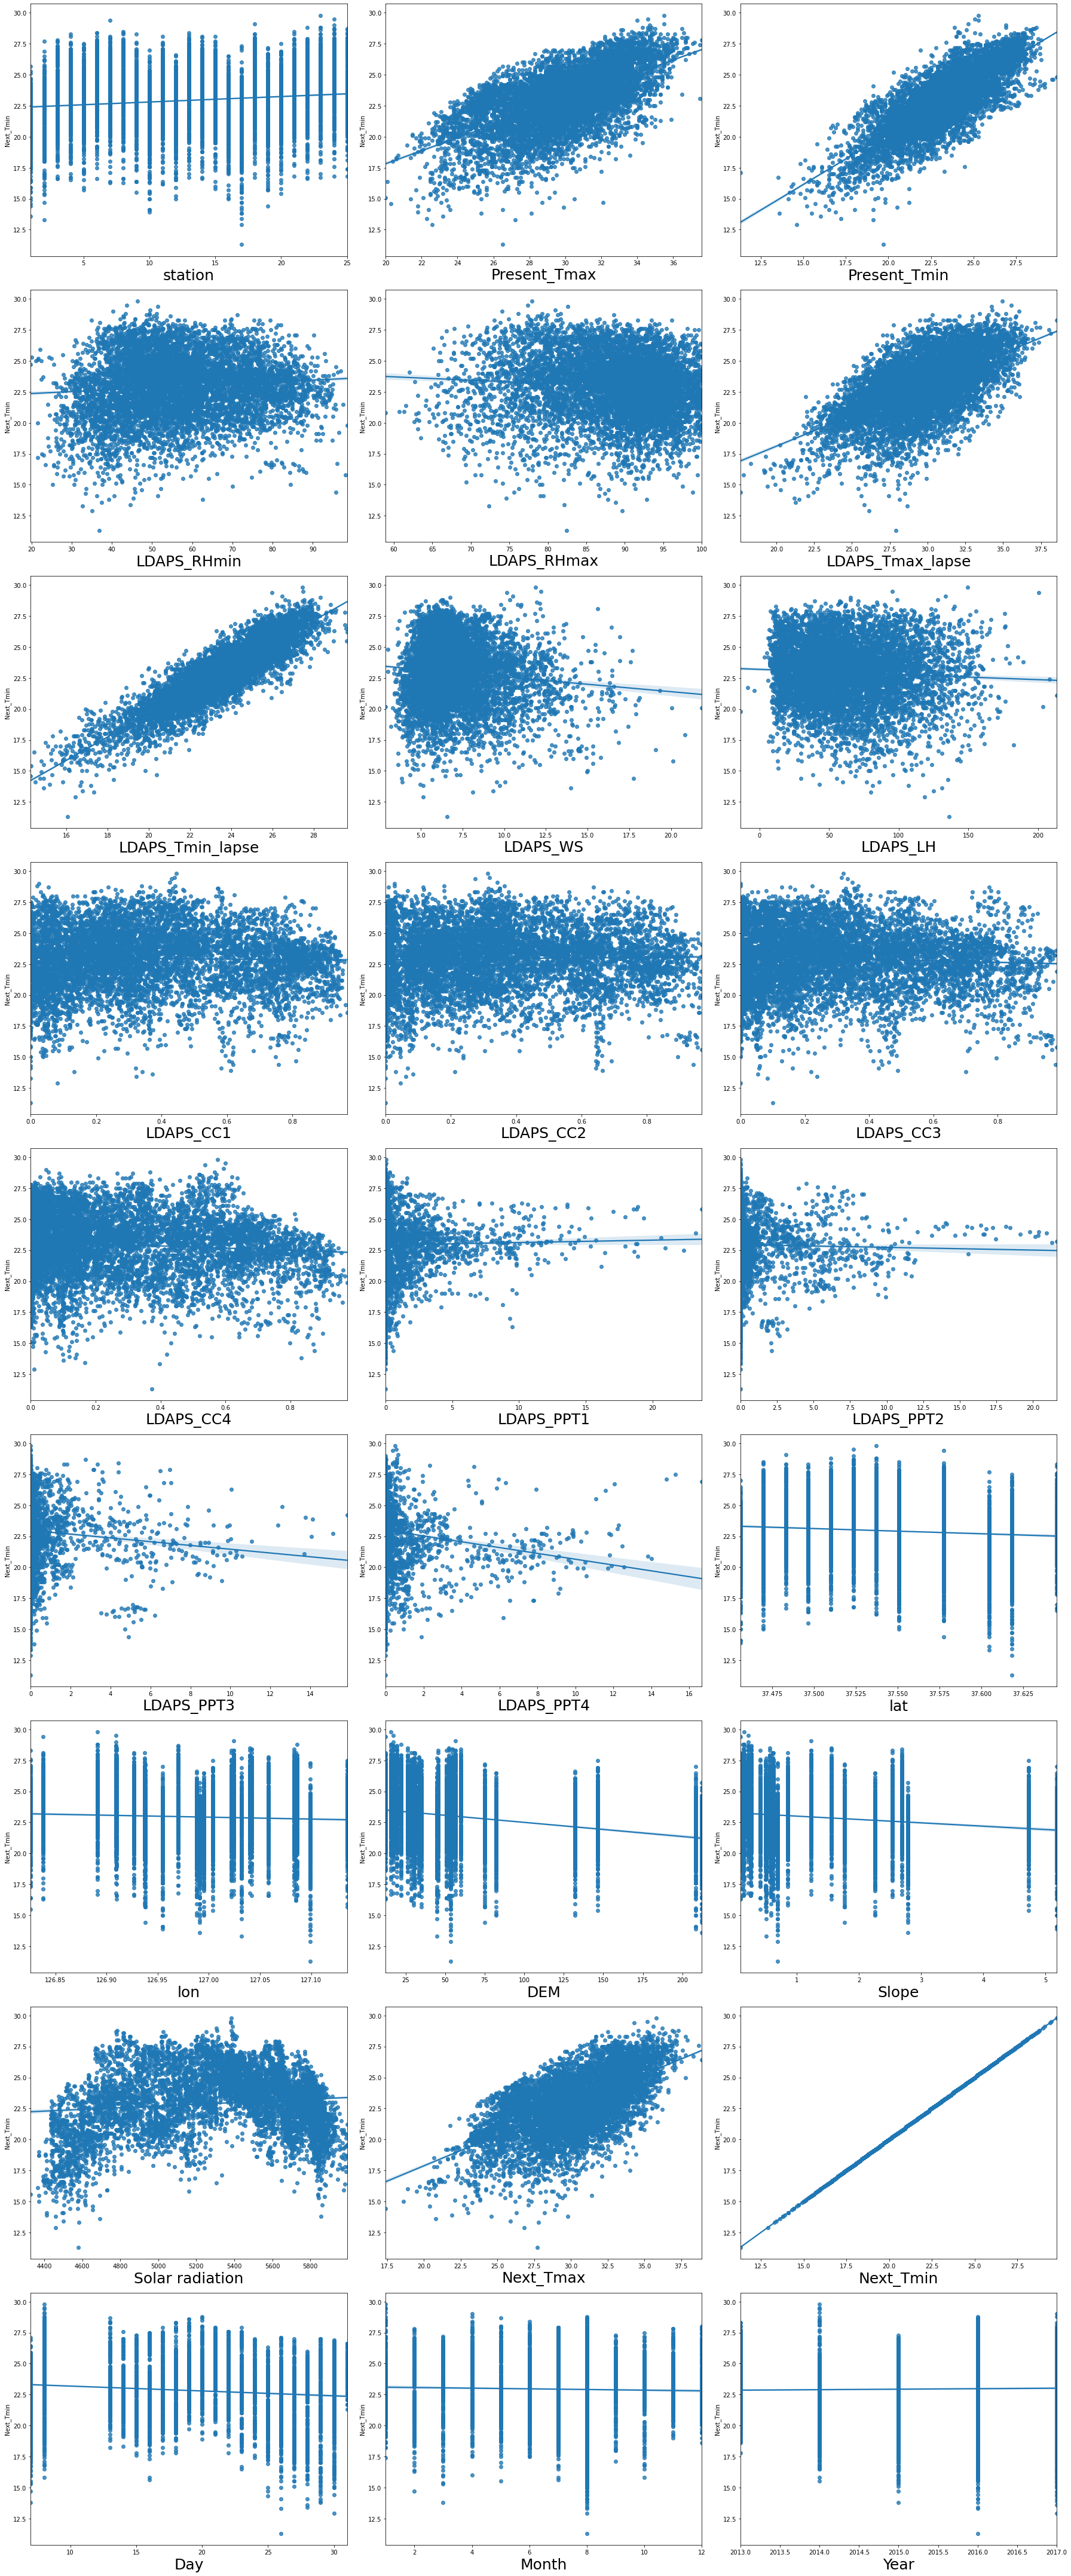

In [49]:
plt.figure(figsize=(25,60), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber <= 27:
        ax = plt.subplot(9,3,plotnumber)
        sns.regplot(x=data[column],y='Next_Tmin',data=data)
        plt.xlabel(column,fontsize=25)
        
    plotnumber+=1
plt.tight_layout()

We can see LDAPS_Tmax_lapse & LDAPS_Tmin_lapse fatures shows strong relationship with target variable Next_Tmin

#### (iii) Multivariate Analysis

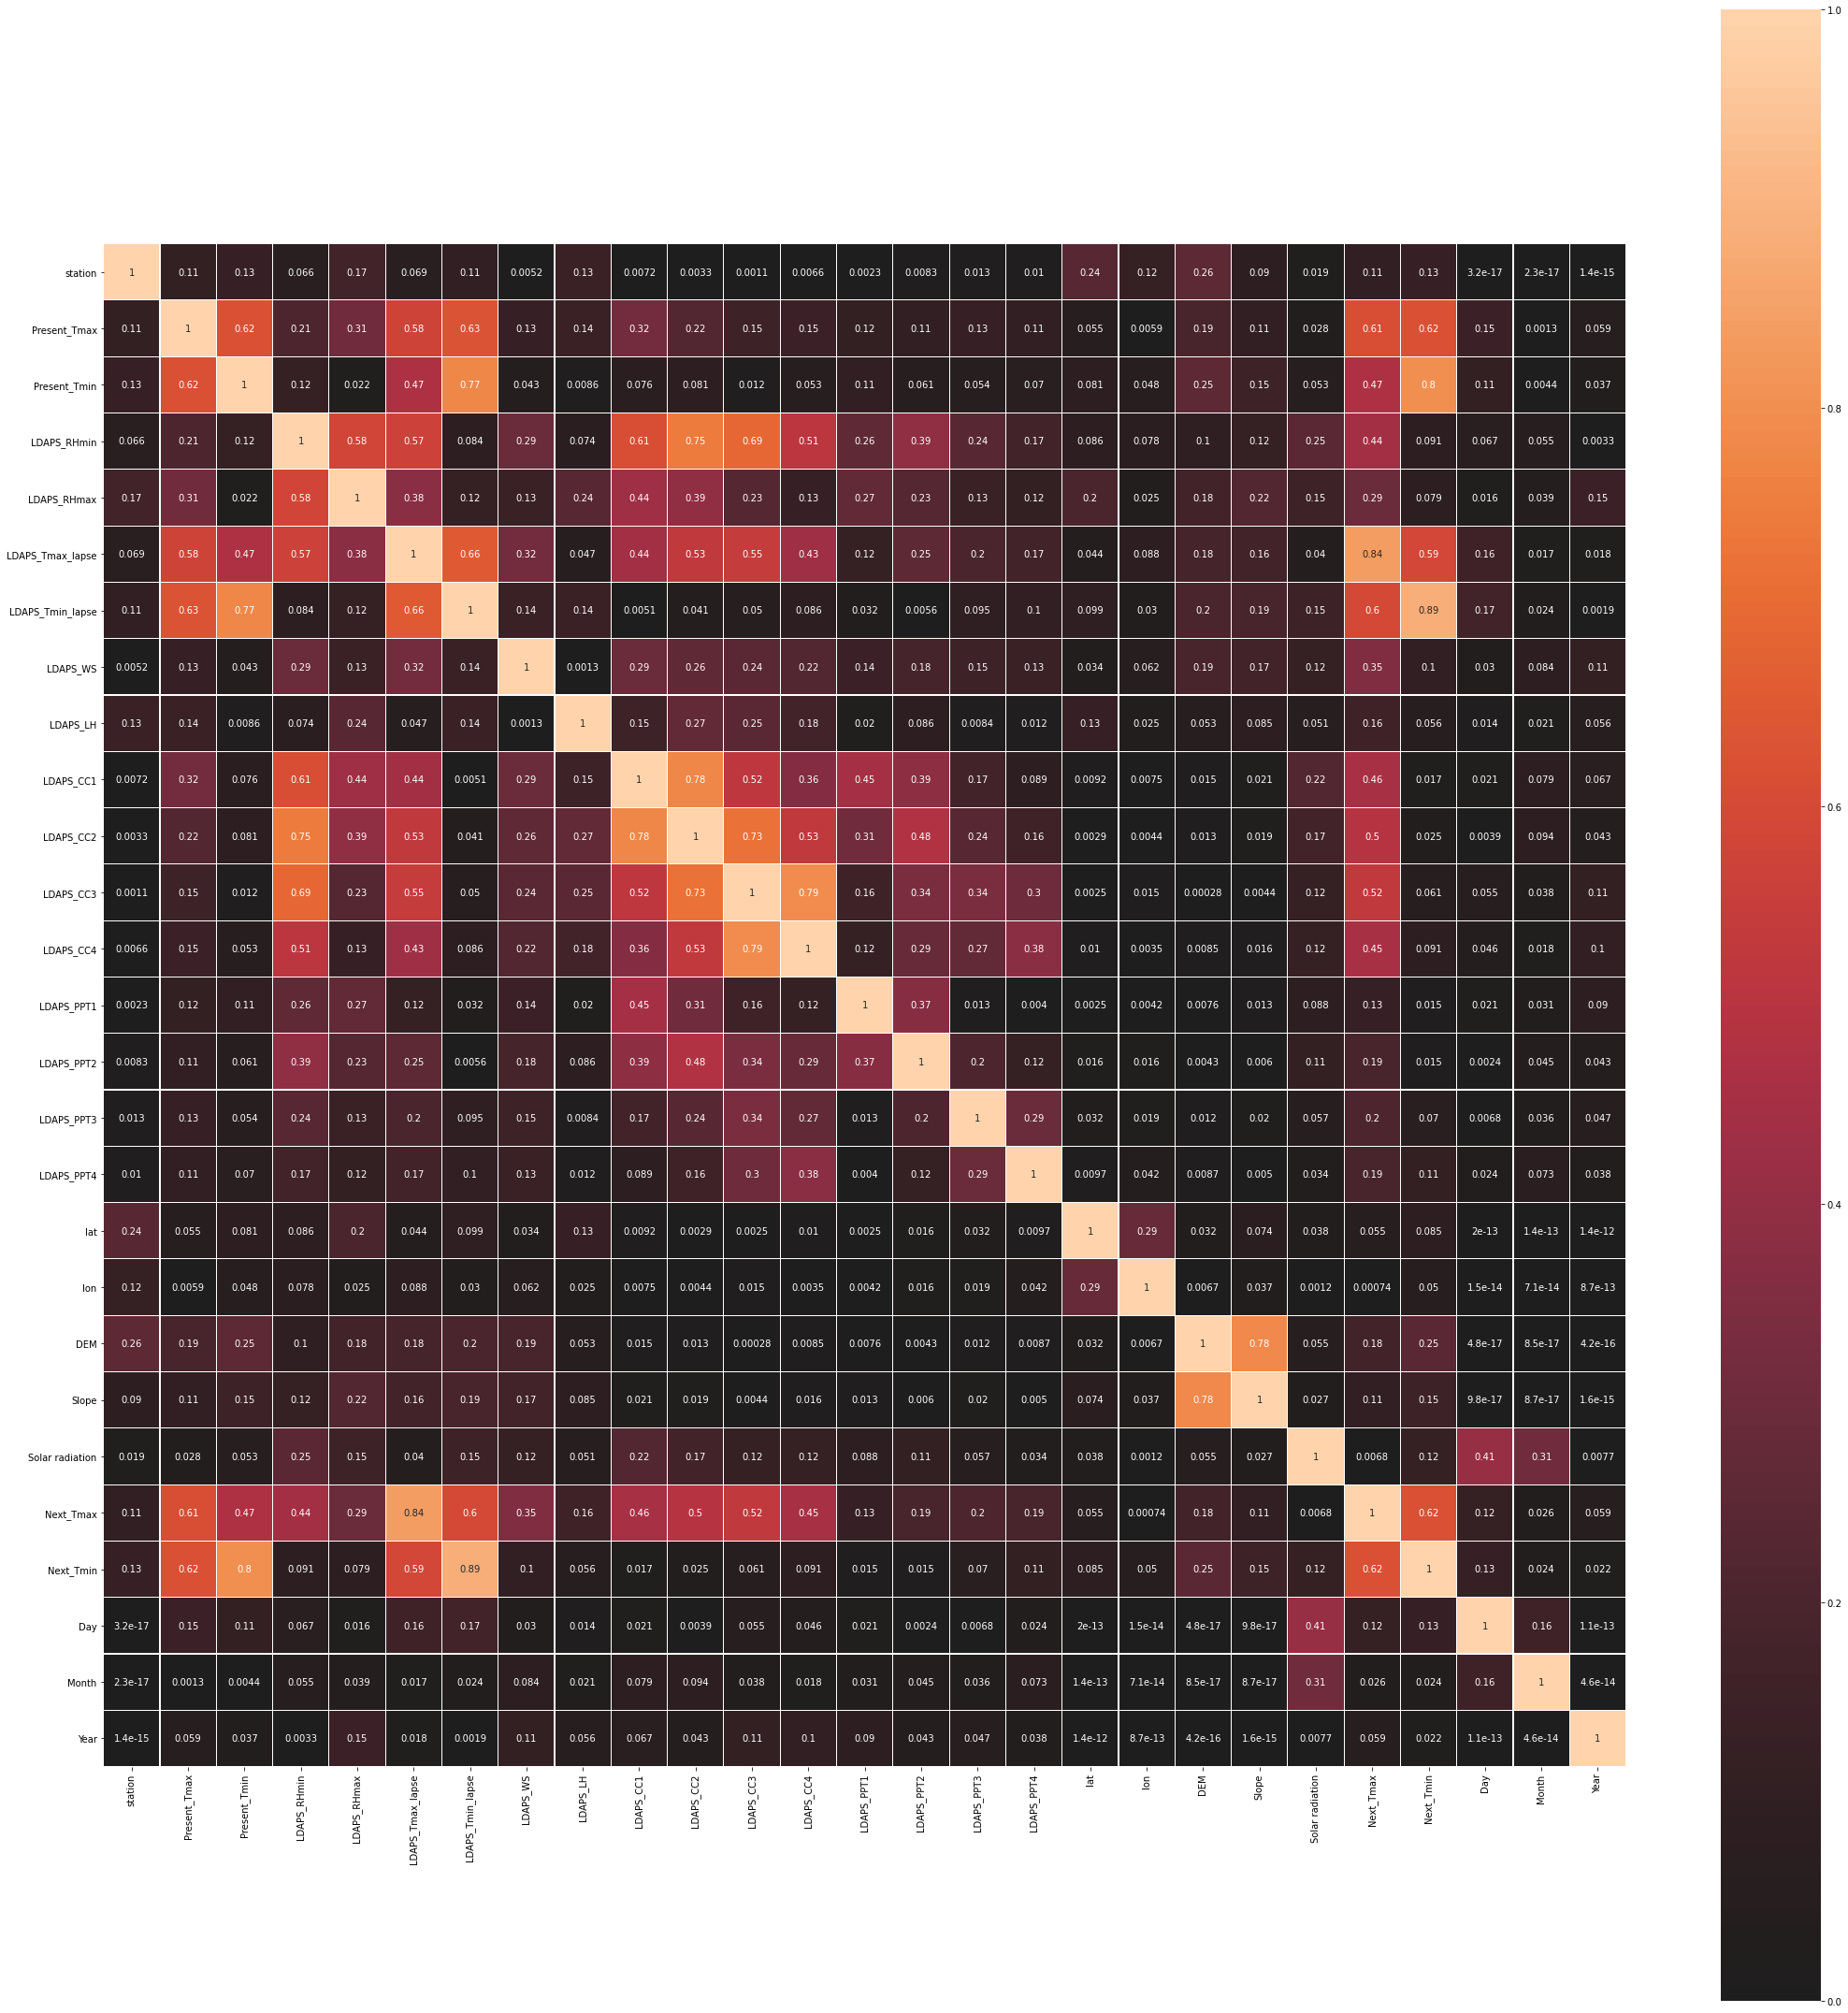

In [87]:
# Let's plot heatmap and check relation between features and label.
data_corr = data.corr().abs()
plt.figure(figsize=(30,30))
sns.heatmap(data_corr,annot=True,square=True,center=0, linewidths=0.1)
plt.tight_layout()

WE can see Persent_Tmax, Persent_Tmin, and all LDAPS columns shows relationship with our target variable  Next_Tmax and Next_Tmin.

<function matplotlib.pyplot.show(close=None, block=None)>

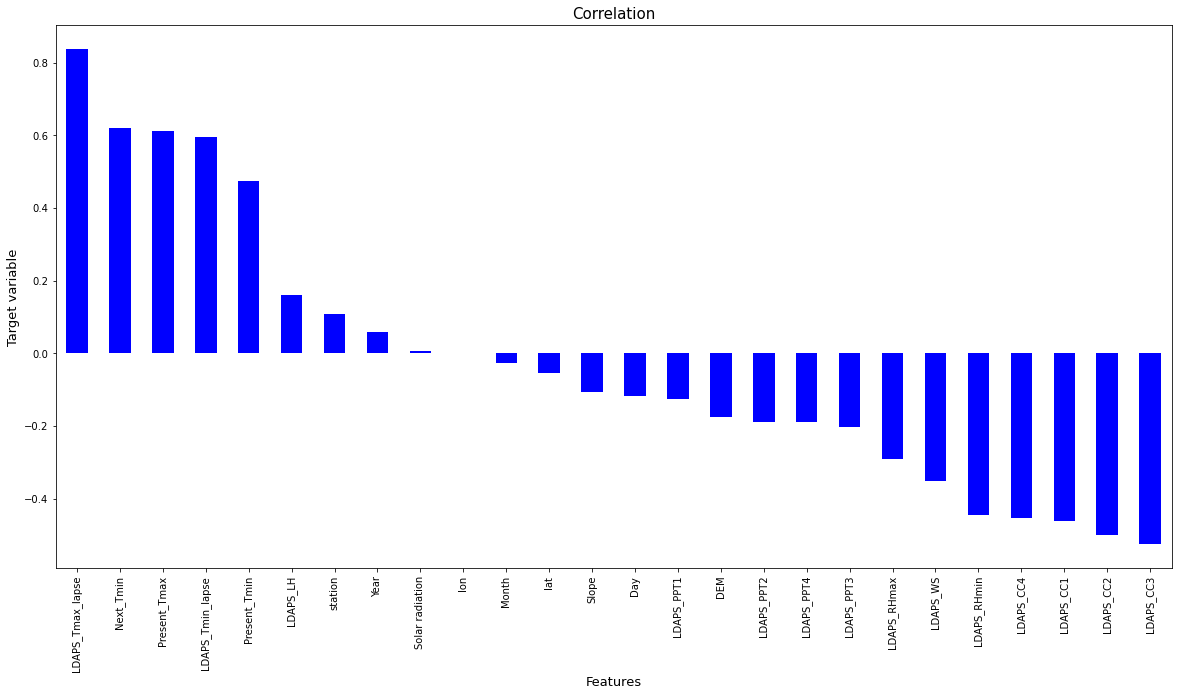

In [88]:
#Let's Plot Bar chart to check correlation between Features(independent variables) and Next_Tmax(Target variable).
plt.figure(figsize=(20,10))
data.corr()['Next_Tmax'].sort_values(ascending=False).drop(['Next_Tmax']).plot(kind='bar',color='b')
plt.xlabel('Features',fontsize=13)
plt.ylabel('Target variable',fontsize=13)
plt.title('Correlation',fontsize=15)
plt.show

This above garph is showing relationship with our target variable Next_Tmax.

<function matplotlib.pyplot.show(close=None, block=None)>

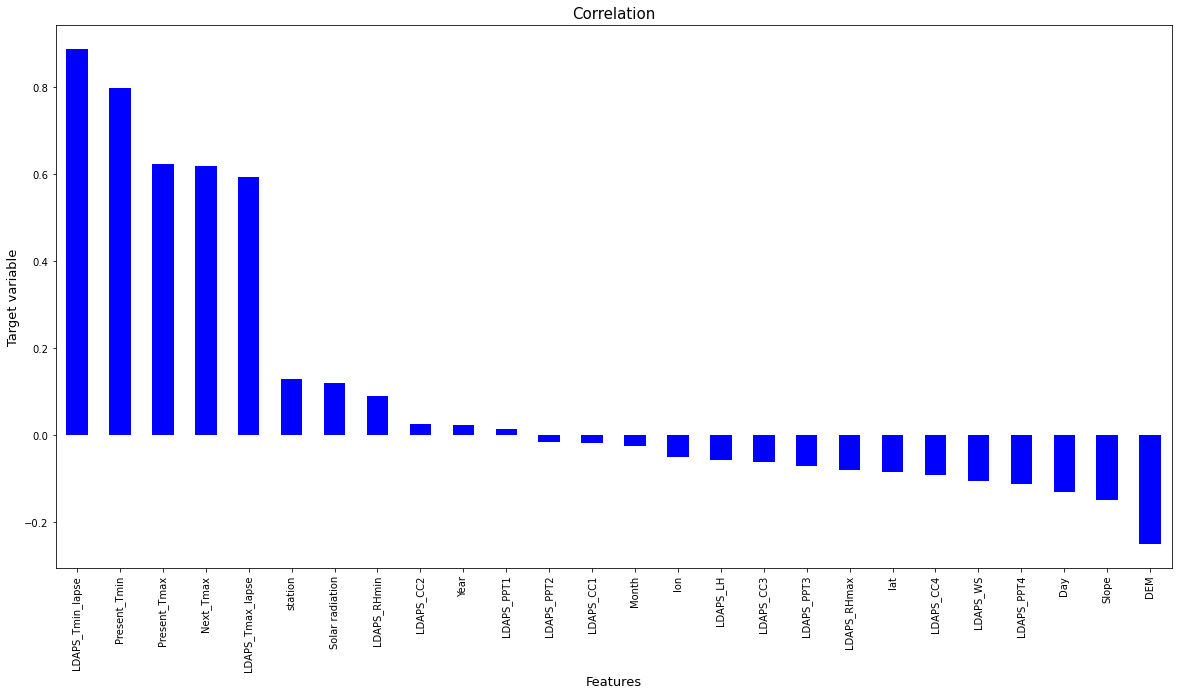

In [89]:
### For target variable  Next_Tmin
plt.figure(figsize=(20,10))
data.corr()['Next_Tmin'].sort_values(ascending=False).drop(['Next_Tmin']).plot(kind='bar',color='b')
plt.xlabel('Features',fontsize=13)
plt.ylabel('Target variable',fontsize=13)
plt.title('Correlation',fontsize=15)
plt.show

This above garph is showing relationship with our target variable Next_Tmin.

## Data Pre-Processing.

In [167]:
data.skew()

station             0.000000
Present_Tmax       -0.262871
Present_Tmin       -0.359430
LDAPS_RHmin         0.305063
LDAPS_RHmax        -0.843672
LDAPS_Tmax_lapse   -0.234188
LDAPS_Tmin_lapse   -0.582865
LDAPS_WS            1.560968
LDAPS_LH            0.660807
LDAPS_CC1           0.466525
LDAPS_CC2           0.479468
LDAPS_CC3           0.648873
LDAPS_CC4           0.672117
LDAPS_PPT1          5.321474
LDAPS_PPT2          5.714391
LDAPS_PPT3          6.365467
LDAPS_PPT4          6.744841
lat                 0.086942
lon                -0.285300
DEM                 1.723944
Slope               1.563346
Solar radiation    -0.511006
Next_Tmax          -0.336242
Next_Tmin          -0.397525
Day                 0.245482
Month              -0.705241
Year                0.000000
dtype: float64

We can see there is skewness in multiple columns lets take skewed columns and perform zscore to remove outlier and skewness

In [208]:
cols = ['LDAPS_PPT1','LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4','LDAPS_WS','DEM','Slope']

In [209]:
from scipy.stats import zscore
z =np.abs(zscore(data[cols]))
df = data[(z<3).all(axis = 1)]

In [210]:
df.skew()

station             0.001317
Present_Tmax       -0.318036
Present_Tmin       -0.371828
LDAPS_RHmin         0.323890
LDAPS_RHmax        -0.770178
LDAPS_Tmax_lapse   -0.175244
LDAPS_Tmin_lapse   -0.552574
LDAPS_WS            1.092595
LDAPS_LH            0.641667
LDAPS_CC1           0.601454
LDAPS_CC2           0.516572
LDAPS_CC3           0.708043
LDAPS_CC4           0.726222
LDAPS_PPT1          3.768776
LDAPS_PPT2          4.930095
LDAPS_PPT3          5.536152
LDAPS_PPT4          6.004194
lat                 0.096926
lon                -0.271695
DEM                 1.754947
Slope               1.594495
Solar radiation    -0.504437
Next_Tmax          -0.292002
Next_Tmin          -0.406544
dtype: float64

In [211]:
print(df.shape,data.shape)

(7041, 24) (7750, 24)


In [212]:
### Let's count data loss after Z_score.
((7750 - 7041)/7750)*100

9.148387096774194

After applying data zscore our data loss is 9.14% which is not acceptable so we are not applying Zscore. Also skewness is not removed completely.

In [213]:
data.head()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0          28.7          21.4    58.255688    91.116364   
1      2.0          31.9          21.6    52.263397    90.604721   
2      3.0          31.6          23.3    48.690479    83.973587   
3      4.0          32.0          23.4    58.239788    96.483688   
4      5.0          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  ...  \
0         28.074101         23.006936  6.818887   69.451805   0.233947  ...   
1         29.850689         24.035009  5.691890   51.937448   0.225508  ...   
2         30.091292         24.565633  6.138224   20.573050   0.209344  ...   
3         29.704629         23.326177  5.650050   65.727144   0.216372  ...   
4         29.113934         23.486480  5.735004  107.965535   0.151407  ...   

   LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM   Slope  \
0         0.0         0.0         0.0  37.6046  126.991  212.3350  2.7850   
1         0.0         0.0         0.0  37.6046  127.032   44.7624  0.5141   
2         0.0         0.0         0.0  37.5776  127.058   33.3068  0.2661   
3         0.0         0.0         0.0  37.6450  127.022   45.7160  2.5348   
4         0.0         0.0         0.0  37.5507  127.135   35.0380  0.5055   

   Solar radiation  Next_Tmax  Next_Tmin  
0      5992.895996       29.1       21.2  
1      5869.312500       30.5       22.5  
2      5863.555664       31.1       23.9  
3      5856.964844       31.7       24.3  
4      5859.552246       31.2       22.5  

[5 rows x 24 columns]

In [214]:
data.drop(columns=['Day','Month','Year'],axis=1,inplace=True)

KeyError: "['Day' 'Month' 'Year'] not found in axis"

In [215]:
data.head()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0          28.7          21.4    58.255688    91.116364   
1      2.0          31.9          21.6    52.263397    90.604721   
2      3.0          31.6          23.3    48.690479    83.973587   
3      4.0          32.0          23.4    58.239788    96.483688   
4      5.0          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  ...  \
0         28.074101         23.006936  6.818887   69.451805   0.233947  ...   
1         29.850689         24.035009  5.691890   51.937448   0.225508  ...   
2         30.091292         24.565633  6.138224   20.573050   0.209344  ...   
3         29.704629         23.326177  5.650050   65.727144   0.216372  ...   
4         29.113934         23.486480  5.735004  107.965535   0.151407  ...   

   LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM   Slope  \
0         0.0         0.0         0.0  37.6046  126.991  212.3350  2.7850   
1         0.0         0.0         0.0  37.6046  127.032   44.7624  0.5141   
2         0.0         0.0         0.0  37.5776  127.058   33.3068  0.2661   
3         0.0         0.0         0.0  37.6450  127.022   45.7160  2.5348   
4         0.0         0.0         0.0  37.5507  127.135   35.0380  0.5055   

   Solar radiation  Next_Tmax  Next_Tmin  
0      5992.895996       29.1       21.2  
1      5869.312500       30.5       22.5  
2      5863.555664       31.1       23.9  
3      5856.964844       31.7       24.3  
4      5859.552246       31.2       22.5  

[5 rows x 24 columns]

In [238]:
### Spliting our dataset in x features and y 
X = data.drop(columns=['Next_Tmax','Next_Tmin'],axis=1)
y_max = data['Next_Tmax']
y_min = data['Next_Tmin']

In [245]:
cols = ['LDAPS_PPT1','LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4','DEM','Slope']

In [246]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
X[cols] = pt.fit_transform(X[cols])

In [247]:
X.head()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0          28.7          21.4    58.255688    91.116364   
1      2.0          31.9          21.6    52.263397    90.604721   
2      3.0          31.6          23.3    48.690479    83.973587   
3      4.0          32.0          23.4    58.239788    96.483688   
4      5.0          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  ...  \
0         28.074101         23.006936  6.818887   69.451805   0.233947  ...   
1         29.850689         24.035009  5.691890   51.937448   0.225508  ...   
2         30.091292         24.565633  6.138224   20.573050   0.209344  ...   
3         29.704629         23.326177  5.650050   65.727144   0.216372  ...   
4         29.113934         23.486480  5.735004  107.965535   0.151407  ...   

   LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat  \
0   0.130928   -0.562861   -0.521517   -0.496188   -0.445831  37.6046   
1   0.127727   -0.562861   -0.521517   -0.496188   -0.445831  37.6046   
2   0.142125   -0.562861   -0.521517   -0.496188   -0.445831  37.5776   
3   0.134249   -0.562861   -0.521517   -0.496188   -0.445831  37.6450   
4   0.170021   -0.562861   -0.521517   -0.496188   -0.445831  37.5507   

       lon       DEM     Slope  Solar radiation  
0  126.991  1.835459  1.314447      5992.895996  
1  127.032  0.056032 -0.385353      5869.312500  
2  127.058 -0.364677 -0.949335      5863.555664  
3  127.022  0.084942  1.235549      5856.964844  
4  127.135 -0.290515 -0.401751      5859.552246  

[5 rows x 22 columns]

In [248]:
X.skew()

station             0.000000
Present_Tmax       -0.262871
Present_Tmin       -0.359430
LDAPS_RHmin         0.305063
LDAPS_RHmax        -0.843672
LDAPS_Tmax_lapse   -0.234188
LDAPS_Tmin_lapse   -0.582865
LDAPS_WS            1.560968
LDAPS_LH            0.660807
LDAPS_CC1           0.466525
LDAPS_CC2           0.479468
LDAPS_CC3           0.648873
LDAPS_CC4           0.672117
LDAPS_PPT1          1.445196
LDAPS_PPT2          1.637775
LDAPS_PPT3          1.806698
LDAPS_PPT4          2.053694
lat                 0.086942
lon                -0.285300
DEM                 0.039436
Slope               0.233914
Solar radiation    -0.511006
dtype: float64

WE can see now skewness is all most removed, Hence we can further process.

### Train - Test Split


In [249]:
# Now converting data into Train test split.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y_max,test_size=0.25,random_state=41)

In [250]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(5812, 22) (5812,) (1938, 22) (1938,)


In [251]:
### Importing models
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor

### Importing Evalution matrices.
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score

In [252]:
### Linear Regression
lr = LinearRegression()
lr.fit(x_train,y_train)
y_lr_pred = lr.predict(x_test)

### Knn Regressor 
knn = KNeighborsRegressor()
knn.fit(x_train,y_train)
y_kn_pred = knn.predict(x_test) #Pridicting x_test data

### DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
y_dtr_pred = dtr.predict(x_test) #Pridicting x_test data

### RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
y_rfr_pred = rfr.predict(x_test) #Pridicting x_test data

### SVR
svr = SVR()
svr.fit(x_train,y_train)
y_svr_pred = svr.predict(x_test) #Pridicting x_test data

### SGDRegressor
sgd = SGDRegressor()
sgd.fit(x_train,y_train)
y_sgd_pred = sgd.predict(x_test) #Pridicting x_test data

### Checking Evalution Metrics and cross validation for all the models.

In [253]:
print('R2 score for Linear regression = ',r2_score(y_test,y_lr_pred))
print('R2 score for KNeighborsRegressor = ',r2_score(y_test,y_kn_pred))
print('R2 score for DecisionTreeRegressor = ',r2_score(y_test,y_dtr_pred))
print('R2 score for RandomForestRegressor = ',r2_score(y_test,y_rfr_pred))
print('R2 score for SVR = ',r2_score(y_test,y_svr_pred))
print('R2 score for SGDRegressor = ',r2_score(y_test,y_sgd_pred))

R2 score for Linear regression =  0.7823622976903479
R2 score for KNeighborsRegressor =  0.5836397735341412
R2 score for DecisionTreeRegressor =  0.779000896955966
R2 score for RandomForestRegressor =  0.9008707114187211
R2 score for SVR =  0.04993051416502858
R2 score for SGDRegressor =  -7.047785579077033e+29


In [254]:
print('CV score for Linear regression = ',cross_val_score(lr,X,y,cv=5).mean())
print('CV score for KNeighborsRegressor = ',cross_val_score(knn,X,y,cv=5).mean())
print('CV score for DecisionTreeRegressor = ',cross_val_score(dtr,X,y,cv=5).mean())
print('CV score for RandomForestRegressor = ',cross_val_score(rfr,X,y,cv=5).mean())
print('CV score for SVR = ',cross_val_score(svr,X,y,cv=5).mean())
print('CV score for SGDRegressor = ',cross_val_score(sgd,X,y,cv=5).mean())

CV score for Linear regression =  0.7116120941012273
CV score for KNeighborsRegressor =  0.21174718572836726
CV score for DecisionTreeRegressor =  0.4107351866239914
CV score for RandomForestRegressor =  0.6923949141775322
CV score for SVR =  -0.07298738770685151
CV score for SGDRegressor =  -2.577723672570563e+30


We can see the R2 score is best for Random forest regressor. But The differnce between Cross validation for Random forest is more as compare to Linear regression.
Therefore we will select Linear regression model is our best model.

#### Now lets perform same for Next_Tmin target variable

In [255]:
# Now converting data into Train test split.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y_min,test_size=0.25,random_state=41)

In [256]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(5812, 22) (5812,) (1938, 22) (1938,)


In [257]:
### Linear Regression
lr = LinearRegression()
lr.fit(x_train,y_train)
y_lr_pred = lr.predict(x_test)

### Knn Regressor 
knn = KNeighborsRegressor()
knn.fit(x_train,y_train)
y_kn_pred = knn.predict(x_test) #Pridicting x_test data

### DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
y_dtr_pred = dtr.predict(x_test) #Pridicting x_test data

### RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
y_rfr_pred = rfr.predict(x_test) #Pridicting x_test data

### SVR
svr = SVR()
svr.fit(x_train,y_train)
y_svr_pred = svr.predict(x_test) #Pridicting x_test data

### SGDRegressor
sgd = SGDRegressor()
sgd.fit(x_train,y_train)
y_sgd_pred = sgd.predict(x_test) #Pridicting x_test data

### Checking Evalution Metrics and cross validation for all the models.

In [258]:
print('R2 score for Linear regression = ',r2_score(y_test,y_lr_pred))
print('R2 score for KNeighborsRegressor = ',r2_score(y_test,y_kn_pred))
print('R2 score for DecisionTreeRegressor = ',r2_score(y_test,y_dtr_pred))
print('R2 score for RandomForestRegressor = ',r2_score(y_test,y_rfr_pred))
print('R2 score for SVR = ',r2_score(y_test,y_svr_pred))
print('R2 score for SGDRegressor = ',r2_score(y_test,y_sgd_pred))

R2 score for Linear regression =  0.8355071023466836
R2 score for KNeighborsRegressor =  0.5225224809936746
R2 score for DecisionTreeRegressor =  0.806899722799588
R2 score for RandomForestRegressor =  0.9086755687042362
R2 score for SVR =  0.10487843199378433
R2 score for SGDRegressor =  -6.248977704166476e+30


In [259]:
print('CV score for Linear regression = ',cross_val_score(lr,X,y,cv=5).mean())
print('CV score for KNeighborsRegressor = ',cross_val_score(knn,X,y,cv=5).mean())
print('CV score for DecisionTreeRegressor = ',cross_val_score(dtr,X,y,cv=5).mean())
print('CV score for RandomForestRegressor = ',cross_val_score(rfr,X,y,cv=5).mean())
print('CV score for SVR = ',cross_val_score(svr,X,y,cv=5).mean())
print('CV score for SGDRegressor = ',cross_val_score(sgd,X,y,cv=5).mean())

CV score for Linear regression =  0.7116120941012273
CV score for KNeighborsRegressor =  0.21174718572836726
CV score for DecisionTreeRegressor =  0.41389520535337676
CV score for RandomForestRegressor =  0.6906842434592522
CV score for SVR =  -0.07298738770685151
CV score for SGDRegressor =  -3.0288869330850036e+30


We can see the R2 score is best for Random forest regressor. But The differnce between Cross validation for Random forest is more as compare to Linear regression.
Therefore we will select Linear regression model is our best model.

### Performing Hyper Parameter tuning.